In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=9
plt.rcParams['axes.titlesize']=plt.rcParams['font.size']
plt.rcParams['figure.figsize']=(6.8,4)
plt.rcParams['text.latex.preamble']=r'\usepackage{amsmath,amssymb,physics,bm}'

In [6]:
import utils_auto 

In [7]:
import pandas as pd

In [8]:
import numpy as np

In [9]:
df ={}

In [10]:
paper_list = ['1106_6060','1508_00296','2004_04168','2008_08998','2110_11330']

In [11]:
for paper in paper_list:
    df[paper.replace('_','.')] = utils_auto.yaml_to_df(paper+'/final_answer.yaml')

In [12]:
df.keys()

dict_keys(['1106.6060', '1508.00296', '2004.04168', '2008.08998', '2110.11330'])

In [13]:
df['2110.11330']

,answer1,answer2,answer3,answer4,paper,trial_idx
1,correct,correct,correct,correct,2110.11330,1
2,correct,incorrect,incorrect,incorrect,2110.11330,2
3,correct,correct,correct,correct,2110.11330,3
4,correct,correct,correct,correct,2110.11330,4
5,correct,correct,correct,correct,2110.11330,5
6,correct,correct,correct,correct,2110.11330,6
7,correct,correct,correct,correct,2110.11330,7
8,correct,incorrect,incorrect,correct,2110.11330,8
9,correct,correct,correct,correct,2110.11330,9
10,correct,correct,correct,correct,2110.11330,10


In [14]:
color_list = {'iceblue':'#b0c9ce'}

In [52]:
import matplotlib.pyplot as plt
def plot_barh(df, xlabel , pad = -6,ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(1.7, 1.7))
    ax = df[::-1].plot(kind='barh', legend=False,ax=ax, color=color_list['iceblue'], edgecolor='k', )
    ax.tick_params(axis='y', pad=pad, color='k', labelcolor='k')
    [tick.set_ha('left') for tick in ax.get_yticklabels()]
    ax.set_xlabel(xlabel)
    ax.set_xlim(0,105)

# Eval accuracy: for paper

In [15]:
total=40
eval_paper={}
for paper in paper_list:
    paper = paper.replace('_','.')
    eval_paper[paper]=df[paper][['answer1', 'answer2', 'answer3', 'answer4']].applymap(lambda x: False if 'F' in x else True).values.sum()/total*100

In [16]:
eval_paper_df = pd.DataFrame.from_dict(eval_paper, orient='index', columns=['Value'])

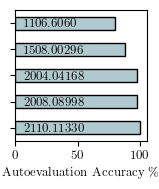

In [39]:
plot_barh(eval_paper_df, xlabel='Autoevaluation Accuracy \%')

# Eval accuracy: for different task

In [18]:
eval_task={}
for paper in paper_list:
    paper = paper.replace('_','.')
    eval_task[paper]=df[paper][['answer1', 'answer2', 'answer3', 'answer4']].applymap(lambda x: False if 'F' in x else True).values.mean(axis=0)*100

In [19]:
eval_task

{'1106.6060': array([100., 100.,  20., 100.]),
 '1508.00296': array([100., 100.,  50., 100.]),
 '2004.04168': array([100., 100.,  90., 100.]),
 '2008.08998': array([100., 100., 100.,  90.]),
 '2110.11330': array([100., 100., 100., 100.])}

In [20]:
eval_task_long_name = {'Task 1':'$k$-mesh', 'Task 2':'Noninteracting term', 'Task 3':'Weak coupling', 'Task 4':'Strong coupling'}

In [21]:
task_mean = np.stack(list(eval_task.values())).mean(axis=0)
task_mean_df = pd.DataFrame(task_mean, index=["Task 1", "Task 2", "Task 3", "Task 4"], columns=["Mean Value"])
task_mean_df.index = task_mean_df.index.map(eval_task_long_name)

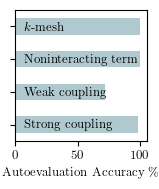

In [35]:
plot_barh(task_mean_df, xlabel='Autoevaluation Accuracy \%')

# Coding:  for different tasks

In [23]:
## Coding is the actual trueness, while autograding is the accuracy of the grader

In [24]:
maps_={
    "correct, F": False,
    "incorrect, F": True,
    "correct": True,
    "incorrect": False,
    "uncertain": False
}

In [25]:
total=40
code_paper={}
for paper in paper_list:
    paper = paper.replace('_','.')
    code_paper[paper]=df[paper][['answer1', 'answer2', 'answer3', 'answer4']].applymap(lambda x: maps_[x]).values.sum()/total *1e2

In [26]:
code_paper_df = pd.DataFrame.from_dict(code_paper, orient='index', columns=['Value'])

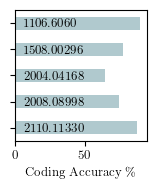

In [36]:
plot_barh(code_paper_df, xlabel='Coding Accuracy \%')

## Code: for different tasks

In [28]:
code_task={}
for paper in paper_list:
    paper = paper.replace('_','.')
    code_task[paper]=df[paper][['answer1', 'answer2', 'answer3', 'answer4']].applymap(lambda x: maps_[x]).values.mean(axis=0)

In [29]:
code_task_mean = np.stack(list(code_task.values())).mean(axis=0)
code_task_mean_df = pd.DataFrame(code_task_mean, index=["Task 1", "Task 2", "Task 3", "Task 4"], columns=["Mean Value"]) * 1e2
code_task_mean_df.index = code_task_mean_df.index.map(eval_task_long_name)

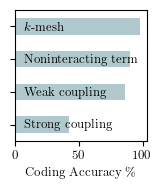

In [37]:
plot_barh(code_task_mean_df, xlabel='Coding Accuracy \%')

# Full

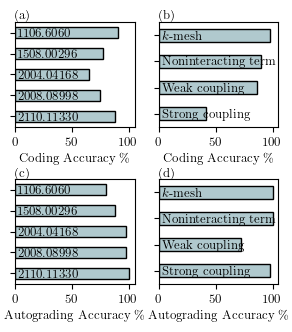

In [56]:
fig, axs =plt.subplots(2,2, figsize=(3.4, 3.4),gridspec_kw={'hspace': 0.5})

plot_barh(code_paper_df, xlabel='Coding Accuracy \%',ax=axs[0,0])
plot_barh(code_task_mean_df, xlabel='Coding Accuracy \%',ax=axs[0,1])
plot_barh(eval_paper_df, xlabel='Autograding Accuracy \%',ax=axs[1,0])

plot_barh(task_mean_df, xlabel='Autograding Accuracy \%',ax=axs[1,1])

[ax.text(0,1,f'({text})',ha='left', va='bottom', fontsize=9, color='k', transform = ax.transAxes) for ax, text in zip(axs.flatten(), ['a','b','c','d'])]

fig.savefig('/mnt/d/Cornell/Paper_HF_Coding/Fig/stats.pdf', bbox_inches='tight')

In [23]:
df[paper_list[2]]

,answer1,answer2,answer3,answer4,paper,trial_idx
1,correct,incorrect,"correct, F",incorrect,2004.04168,1
2,correct,correct,correct,incorrect,2004.04168,2
3,correct,correct,correct,incorrect,2004.04168,3
4,correct,correct,correct,correct,2004.04168,4
5,correct,correct,correct,incorrect,2004.04168,5
6,correct,correct,correct,correct,2004.04168,6
7,correct,incorrect,incorrect,incorrect,2004.04168,7
8,correct,correct,correct,incorrect,2004.04168,8
9,correct,correct,correct,incorrect,2004.04168,9
10,correct,incorrect,incorrect,incorrect,2004.04168,10


In [20]:
code_paper[paper_list[1]]

0.775

In [22]:
1-9/40

0.775